In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,7

import csv
import pandas as pd

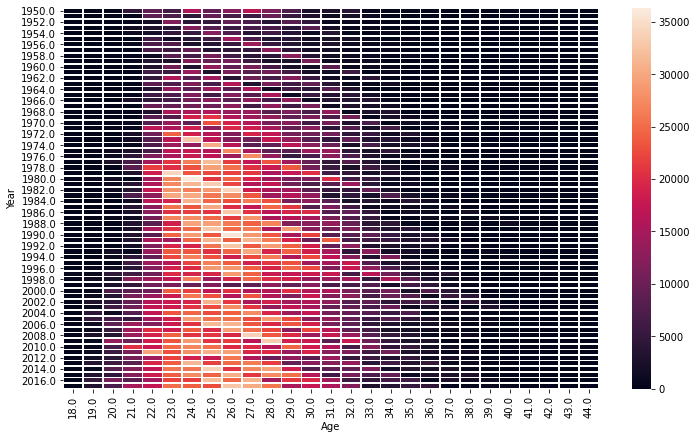

In [62]:
#1. В визуализации используются переменные - year, age, pts. 
nba_season_stats = pd.read_csv(
    'NBA/Seasons_stats.csv')
drop_columns = ['Pos', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%','eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
nba_season_stats.drop(drop_columns, axis='columns', inplace=True)
nba_season_stats
age_pts_year = nba_season_stats.pivot_table(
                        index='Year', 
                        columns='Age', 
                        values='PTS', 
                        aggfunc=sum).fillna(0).applymap(float)

sns.heatmap(age_pts_year, linewidths=0.5)
# Вывод: Пик формы всех игроков в NBA с 1950 по 2017 приходится на 24-26 лет

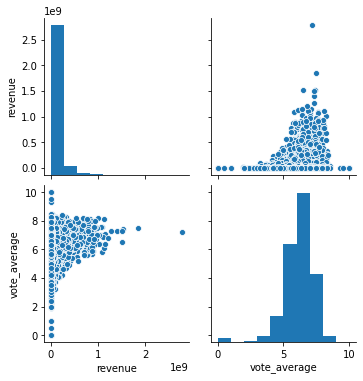

In [65]:
#2. В визуализации используются переменные - revenue, vote_average.
import seaborn as sns
df = pd.read_csv(
    'IMDB/tmdb_5000_movies.csv')
drop_columns = ['genres', 'homepage', 'id', 'keywords', 'budget', 'popularity', 'runtime', 'vote_count', 'original_language', 'original_title', 'overview', 'production_companies', 'spoken_languages', 'status', 'tagline', 'title', 'production_countries']
df.drop(drop_columns, axis='columns', inplace=True)
df.head(5)
sns_plot = sns.pairplot(
    df[['revenue', 'vote_average']])
sns_plot
# Вывод: Все фильмы собравшие от 0.5 миллиарда и выше имеют оценку зрителей - 5 и выше. Зрители редко ошибаются

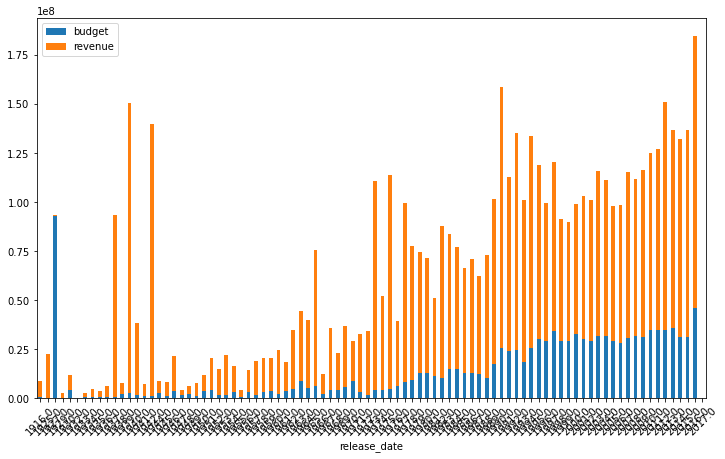

In [49]:
#3. Переменные в визуализации - budget, revenue, release_date. 
import seaborn as sns
df = pd.read_csv(
    'IMDB/tmdb_5000_movies.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df.release_date.dt.year
drop_columns = ['genres', 'homepage', 'id', 'vote_average', 'keywords', 'runtime', 'popularity', 'vote_count', 'original_title', 'overview', 'production_companies', 'spoken_languages', 'status', 'tagline', 'title', 'production_countries']
df.drop(drop_columns, axis='columns', inplace=True)
df1 = df[['budget'] + ['revenue'] + ['release_date']].groupby('release_date').mean()
df1.plot(kind='bar', rot=45, stacked=True)
# Вывод: Растут бюджеты кино - пропорционально растет касса



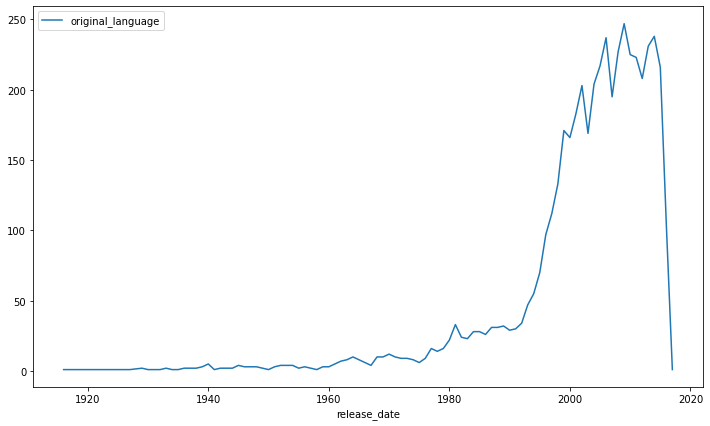

In [53]:
#4. Переменные в визуализации - original_language, release_date.
import seaborn as sns
df = pd.read_csv(
    'IMDB/tmdb_5000_movies.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df.release_date.dt.year
drop_columns = ['genres', 'homepage', 'id', 'vote_average', 'revenue', 'keywords', 'runtime', 'vote_count', 'original_title', 'overview', 'production_companies', 'spoken_languages', 'status', 'tagline', 'title', 'production_countries']
df.drop(drop_columns, axis='columns', inplace=True)
df1 = df[['original_language'] + ['release_date']].groupby('release_date').count()
# df1.head()
df1.plot()

# Вывод: После 80-х появился резкий подъем не голливудского кино. После 2000-х было использовано более 200 языков.

Text(0, 0.5, 'Count')

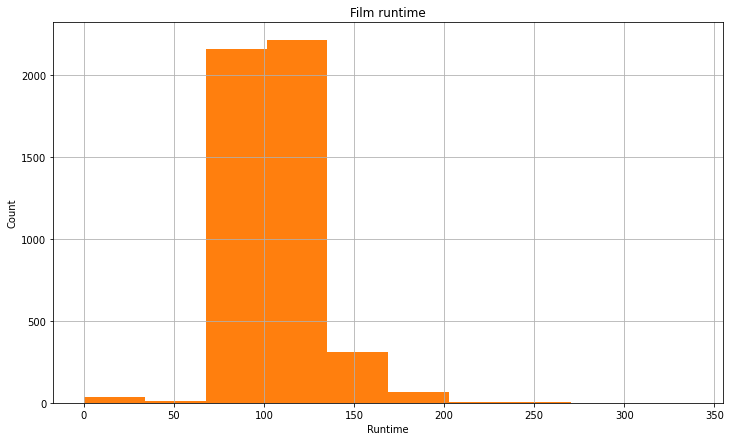

In [59]:
#5. Переменные в визуализации - Runtime.

df = pd.read_csv(
    'IMDB/tmdb_5000_movies.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df.release_date.dt.year
df.runtime.hist()
ax = df.runtime.hist()
ax.set_title('Film runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Count')

# Вывод: Более половины фильмов имеет хронометраж более 100 минут и менее 140. Это обусловленно стандартами кино на длинну \
# полного метра